# Exploring and visualizing data

Throughout this course, we will examine a number of datasets and develop techniques to quantify relationships between observed data. However, before we develop quantitative models of data, it is often useful to first develop a _qualitative_ understanding of the relationships present in data, which we can then use to formulate hypotheses that can be tested using quantitive models. 

Visualization is often an extremely useful tool for uncovering relationships within data. In this section, we walk through several examples of exploring and visualizing data in python.

## Infant mortality data
## Loading data into python

Before we can perform any analysis, we first need to load data into python. We will most commonly use the python package `pandas` to do this. We first import `pandas` so that we can use methods contained in the package.

In [1]:
import pandas as pd

Note here that `as pd` assigns the `pandas` package the alias `pd`, so that we whenever we want to refer to `pandas` in the subsequent code, we can just use `pd` (rather than typing out `pandas` every time). This is standard practice with many packages in python, as you will see.

Now that we've loaded `pandas`, we can use the `read_csv` method to read in a dataset and inspect the first few rows.

In [2]:
mortality_data = pd.read_csv('datasets/infant_mortality.csv')
mortality_data.head()

,country,income,infant_mortality,region,oil
0,Australia,3426,26.7,Asia,no
1,Austria,3350,23.7,Europe,no
2,Belgium,3346,17.0,Europe,no
3,Canada,4751,16.8,Americas,no
4,Denmark,5029,13.5,Europe,no


When you read a dataset in python using `pandas`, it is stored as as `pandas.DataFrame` object, which we can check using the `type` function:

In [3]:
type(mortality_data)

pandas.core.frame.DataFrame

Dataframes are very convenient ways to work with data, as we will see throughout this course.

The infant mortality dataset contains the following information about 105 countries: the per-capita income, the infant mortality rate, its region in the world, and whether or not the country is oil-exporting.

## Basic visualization

For now, let's focus on the variables `infant_mortality` and `income`. A histogram is a common way to visualize the distributions of these features, which we can create using the package `matplotlib`.

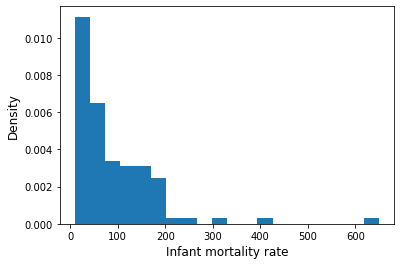

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(mortality_data["infant_mortality"], bins=20, density=True)
plt.xlabel("Infant mortality rate", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.show()

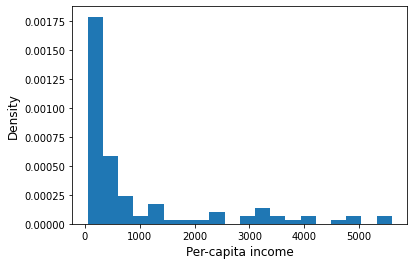

In [5]:
plt.hist(mortality_data["income"], bins=20, density=True)
plt.xlabel("Per-capita income", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.show()

This gives us a sense of the types of values the variables `infant_mortality` and `income` can take on, but what about the relationship between these two features? A simple way to inspect this relationship is by creating a scatter plot.

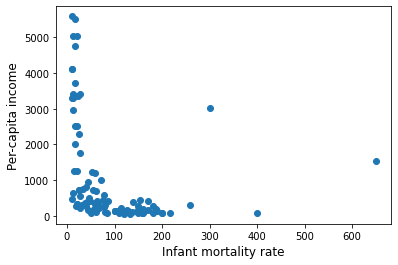

In [6]:
plt.scatter(mortality_data["infant_mortality"], mortality_data["income"])
plt.xlabel("Infant mortality rate", fontsize=12)
plt.ylabel("Per-capita income", fontsize=12)
plt.show()

From this plot, we observe that, in general, there is a negative relationship between infant mortality rate and per-capita income -- richer countries tend to have lower infant mortality rates. However, there are a few outliers: countries that have high income _and_ high infant mortality. We can quickly find these by looking back at the data.

In [7]:
mortality_data[mortality_data["infant_mortality"] > 280]

,country,income,infant_mortality,region,oil
25,Libya,3010,300.0,Africa,yes
27,Saudi.Arabia,1530,650.0,Asia,yes
72,Afganistan,75,400.0,Asia,no


We see that the two outliers are Libya and Saudi Arabia. Interestingly, we note these two countries are both oil exporting countries. So perhaps we may hypothesize that the relationship between infant mortality and per-capita income depends on whether or not the countries are oil exporting. Let's plot these features for oil-exporting countries only to see if this is indeed the case.

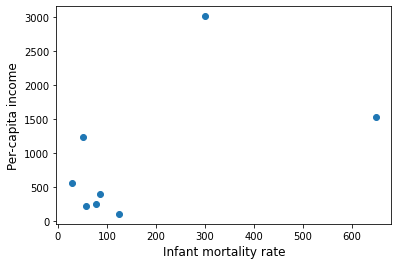

In [8]:
# select only the oil exporting countries
mortality_data_oil_exporting = mortality_data[mortality_data["oil"] == "yes"]

plt.scatter(mortality_data_oil_exporting["infant_mortality"], mortality_data_oil_exporting["income"])
plt.xlabel("Infant mortality rate", fontsize=12)
plt.ylabel("Per-capita income", fontsize=12)
plt.show()

Now the negative relationship we observed below appears to disappear! If we were researchers of infant mortality, this would now provide a new hypothesis ripe for further investigation. In particular, we may want to quantify exactly how much income influences infant mortality rate, and how this quantity changes when we control for whether a country is oil-exporting.

## Transforming data

Note that while the relationship we observed between infant mortality and per-capita income was indeed decreasing, it was not _linear_ -- by which we mean that the data does not appear to lie approximately on a line (we will get to be much more formal about this in subsequent sections).

This is primarily because the histograms of infant mortality and per-capita income were heavily skewed -- meaning that there are many outliers on the high end of either variable. One way that we can mitigate this is by _transforming_ the features. Since the issue is with a few large values, we should consider transformations that "squish" large values. For example we might consider either the square root or log transformations, which both have this property.

Let's see what happens to the histograms when we perform these transformations to the per-capita income variable.

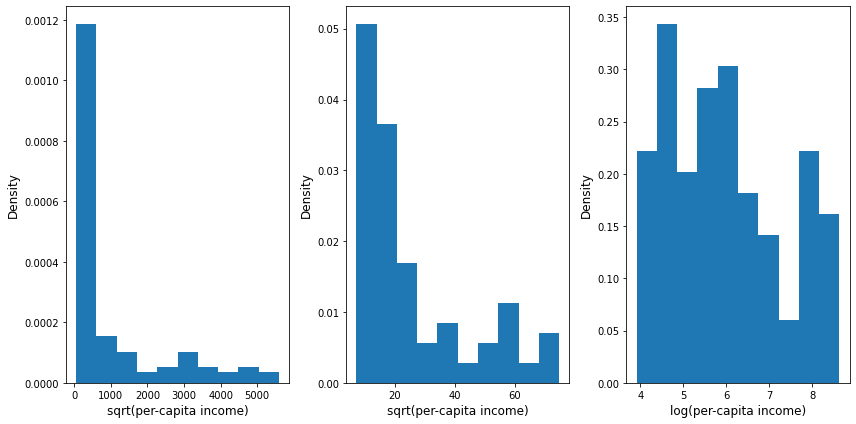

In [9]:
import numpy as np

fig, axs = plt.subplots(nrows= 1, ncols=3, figsize=(12,6))
axs = axs.flatten()

axs[0].hist(mortality_data["income"], bins=10, density=True)
axs[0].set_xlabel("sqrt(per-capita income)", fontsize=12)
axs[0].set_ylabel("Density", fontsize=12)

sqrt_income = np.sqrt(mortality_data["income"])
axs[1].hist(sqrt_income, bins=10, density=True)
axs[1].set_xlabel("sqrt(per-capita income)", fontsize=12)
axs[1].set_ylabel("Density", fontsize=12)

log_income = np.log(mortality_data["income"])
axs[2].hist(log_income, bins=10, density=True)
axs[2].set_xlabel("log(per-capita income)", fontsize=12)
axs[2].set_ylabel("Density", fontsize=12)

plt.tight_layout()
plt.show()

From inspecting these histograms, we see that the square root transformation doesn't quite resolve the skewness, while the log transformation does. Let's verify this by plotting a new scatterplot of log-per-capita income versus log-infant mortality.

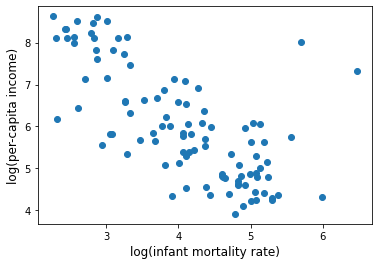

In [10]:
plt.scatter(np.log(mortality_data["infant_mortality"]), np.log(mortality_data["income"]))
plt.xlabel("log(infant mortality rate)", fontsize=12)
plt.ylabel("log(per-capita income)", fontsize=12)
plt.show()